In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns=30


In [2]:
data=pd.read_csv("Desktop/CIS4170/Project 3/streeteasy.csv")

In [3]:
data.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
data.shape

(5000, 20)

In [5]:
data.isna().sum()

rental_id           0
building_id         0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
submarket           0
borough             0
dtype: int64

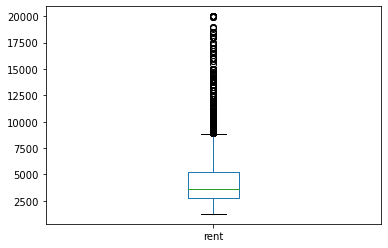

In [6]:
data.rent.plot.box()

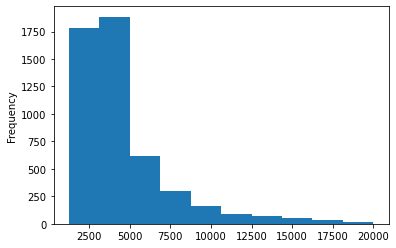

In [7]:
data.rent.plot.hist()

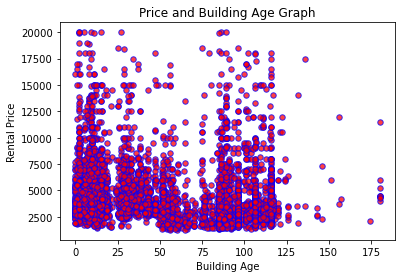

In [8]:
#scatterplot visualisation
import matplotlib.pyplot as plt
plt.scatter(x=data['building_age_yrs'],y=data['rent'], s=30, c='red', edgecolor='blue', linewidth=1, alpha=0.75)
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Building Age')
plt.ylabel('Rental Price')
plt.title("Price and Building Age Graph")
plt.draw()

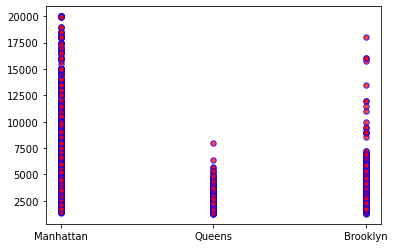

In [9]:
#scatterplot visualisation
import matplotlib.pyplot as plt
plt.scatter(x=data['borough'],y=data['rent'], s=30, c='red', edgecolor='blue', linewidth=1, alpha=0.75)
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.draw()

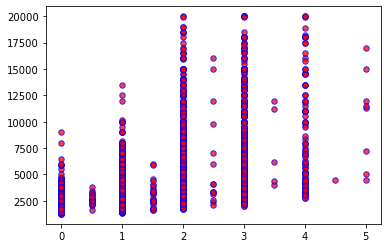

In [10]:
#scatterplot visualisation
import matplotlib.pyplot as plt
plt.scatter(x=data['bedrooms'],y=data['rent'], s=30, c='red', edgecolor='blue', linewidth=1, alpha=0.75)
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.draw()

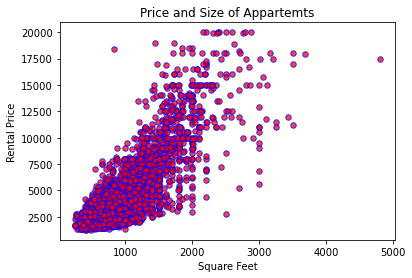

In [11]:
#scatterplot visualisation
import matplotlib.pyplot as plt
plt.scatter(x=data['size_sqft'],y=data['rent'], s=30, c='red', edgecolor='blue', linewidth=1, alpha=0.75)
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Square Feet')
plt.ylabel('Rental Price')
plt.title("Price and Size of Appartemts")
plt.draw()

In [12]:
data.query('size_sqft>4000') 

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,All Downtown,Manhattan


In [13]:
data['rent'].describe()

count     5000.000000
mean      4536.920800
std       2929.838953
min       1250.000000
25%       2750.000000
50%       3600.000000
75%       5200.000000
max      20000.000000
Name: rent, dtype: float64

In [14]:
data = data.drop(['neighborhood','submarket', 'borough'],axis=1)

In [15]:
data.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = [RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100)]
learning_mods = pd.DataFrame()
temp = {}

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
X = data.drop("rent", axis=1)

In [19]:
X

,rental_id,building_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,1545,44518357,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2472,94441623,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,10234,87632265,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0
3,2919,76909719,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
4,2790,92953520,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1964,73060494,1.0,1,686,9,4.0,3,1,0,0,0,0,0,0,0
4996,5686,92994390,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
4997,9679,7689663,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
4998,5188,62828354,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [20]:
y = data["rent"]

In [21]:
y

0        2550
1       11500
2        3000
3        4500
4        4795
        ...  
4995     2650
4996     6675
4997     1699
4998     3475
4999     4500
Name: rent, Length: 5000, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
y_train

241     2995
2634    8500
4157    1625
4991    9000
365     2600
        ... 
562     2348
1910    2350
2569    3600
2524    2499
2673    6800
Name: rent, Length: 3500, dtype: int64

In [24]:
X_train

,rental_id,building_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
241,3595,89569735,2.0,1,800,3,2.0,106,0,0,0,0,0,0,0,0
2634,7064,15028300,2.0,2,1287,2,32.0,43,0,0,0,0,0,0,0,0
4157,84,10606754,0.0,1,500,4,3.0,70,0,0,0,0,0,0,0,0
4991,2404,20773991,0.0,1,1800,3,10.0,113,1,0,0,0,0,0,0,0
365,3194,82658811,0.0,1,469,1,39.0,7,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,10873,55781863,1.0,1,760,1,3.0,96,1,0,0,0,0,0,0,0
1910,7413,86450795,2.0,2,1250,8,5.0,54,0,0,0,0,0,0,0,0
2569,3558,88887969,2.0,1,900,1,6.0,87,0,1,1,1,1,1,0,0
2524,8084,5941446,0.0,1,600,6,21.0,87,0,0,0,0,0,0,0,0


In [25]:
clf_lr = LogisticRegression()

In [26]:
# fit the dataset into LogisticRegression Classifier
clf_lr.fit(X_train, y_train)

C:\Users\mrsil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# predict on the unseen data
pred_lr = clf_lr.predict(X_test)

In [28]:
clf_rf = RandomForestClassifier(random_state=1)
pred_rf = clf_rf.fit(X_train, y_train).predict(X_test)

In [29]:
clf_dt = DecisionTreeClassifier()
pred_dt = clf_dt.fit(X_train, y_train).predict(X_test)

In [30]:
print("Accuracy of Logistic Regression:", accuracy_score(pred_lr, y_test))

Accuracy of Logistic Regression: 0.027333333333333334


In [31]:
print("Accuracy of Random Forest:", accuracy_score(pred_rf, y_test))

Accuracy of Random Forest: 0.06666666666666667


In [32]:
print("Accuracy of Decision Tree:", accuracy_score(pred_dt, y_test))

Accuracy of Decision Tree: 0.04133333333333333


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [34]:
Z=data[['rent', 'size_sqft']]

In [35]:
Z

,rent,size_sqft
0,2550,480
1,11500,2000
2,3000,1000
3,4500,916
4,4795,975
...,...,...
4995,2650,686
4996,6675,988
4997,1699,250
4998,3475,651


In [36]:
Z1 = Z.iloc[:, 0:2].values

In [37]:
Z1

array([[ 2550,   480],
       [11500,  2000],
       [ 3000,  1000],
       ...,
       [ 1699,   250],
       [ 3475,   651],
       [ 4500,   816]], dtype=int64)

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(Z1)

array([2, 0, 2, ..., 2, 2, 4], dtype=int64)

In [39]:
import scipy.cluster.hierarchy as shc

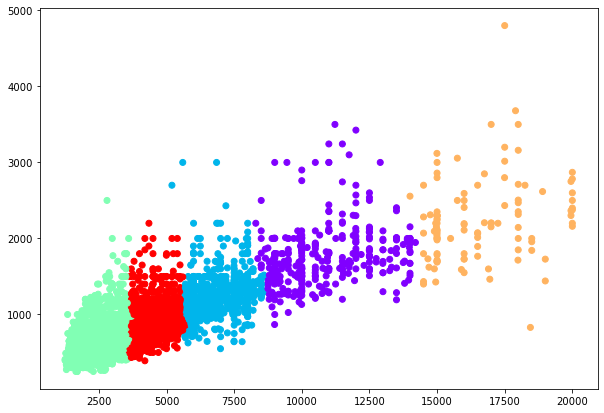

In [40]:
# plot the clusters to see how actually our data has been clustered
plt.figure(figsize=(10, 7))
plt.scatter(Z1[:,0], Z1[:,1], c=cluster.labels_, cmap='rainbow')

In [41]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [42]:
X2 = data[['bedrooms','size_sqft','bathrooms', 'min_to_subway' ]]

In [43]:
X2

,bedrooms,size_sqft,bathrooms,min_to_subway
0,0.0,480,1,9
1,2.0,2000,2,4
2,3.0,1000,1,4
3,1.0,916,1,2
4,1.0,975,1,3
...,...,...,...,...
4995,1.0,686,1,9
4996,2.0,988,2,5
4997,0.0,250,1,2
4998,1.0,651,1,6


In [44]:
Y2 = data['rent']

In [45]:
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

LinearRegression()

In [46]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -1077.9494437229714
Coefficients: 
 [-601.77124605    4.75803623 1615.05404294  -11.33423549]


In [47]:
# prediction with sklearn
bedrooms_new = 3
size_sqft_new = 2100
bathrooms_new=1
min_to_subway_new=9
print ('Predicted Rental Price: \n', regr.predict([[bedrooms_new ,size_sqft_new, bathrooms_new, min_to_subway_new]]))

Predicted Rental Price: 
 [8621.65882718]


In [48]:
# with statsmodels

 
model = sm.OLS(Y2, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                   rent   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          1.218e+04
Date:                Thu, 24 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:43:45   Log-Likelihood:                         -44128.
No. Observations:                5000   AIC:                                  8.826e+04
Df Residuals:                    4996   BIC:                                  8.829e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [49]:
import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from pandas import Series
from numpy.random import randn

In [50]:
import pandas as pd

In [51]:
M = data[['bedrooms','min_to_subway' ]]
M2 = M.iloc[:, 0:2].values

In [52]:
M2

array([[0., 9.],
       [2., 4.],
       [3., 4.],
       ...,
       [0., 2.],
       [1., 6.],
       [1., 4.]])

In [53]:
S = data[['rent']]
S2 = S.iloc[:, 0:1].values

In [54]:
S2

array([[ 2550],
       [11500],
       [ 3000],
       ...,
       [ 1699],
       [ 3475],
       [ 4500]], dtype=int64)

In [55]:
df=pd.DataFrame(M2, columns=['bedrooms', 'min_to_subway' ])

In [56]:
df['rent']=pd.Series(Y2)

In [57]:
df

,bedrooms,min_to_subway,rent
0,0.0,9.0,2550
1,2.0,4.0,11500
2,3.0,4.0,3000
3,1.0,2.0,4500
4,1.0,3.0,4795
...,...,...,...
4995,1.0,9.0,2650
4996,2.0,5.0,6675
4997,0.0,2.0,1699
4998,1.0,6.0,3475


In [58]:
import statsmodels.formula.api as smf

In [59]:
model=smf.ols(formula='rent~bedrooms+min_to_subway', data=df)

In [60]:
results_formula=model.fit()

In [61]:
results_formula.params

Intercept        2340.966595
bedrooms         1623.487739
min_to_subway     -13.771388
dtype: float64

In [62]:
x_surf, y_surf = np.meshgrid(np.linspace(df.bedrooms.min(), df.bedrooms.max(), 100), 
                             
                             np.linspace(df.min_to_subway.min(), df.min_to_subway.max(), 100))
                                                                                        

In [63]:
onlyX = pd.DataFrame({'bedrooms': x_surf.ravel(), 'min_to_subway': y_surf.ravel()})

In [64]:
fittedY=results_formula.predict(exog=onlyX)

In [65]:
fittedY=np.array(fittedY)

In [66]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [67]:
ax=fig.add_subplot(111, projection='3d')

In [68]:
ax.scatter(df['bedrooms'], df['min_to_subway'], df['rent'], c='red', marker='o', alpha=0.5)

In [69]:
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='None', alpha=0.3)

In [70]:
plt.show()